<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/YOUTUBE%20APPUPAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Read the csv file
df = pd.read_csv('/content/Book1.csv')
print(df.head()) #7 columns, including the Date

         date      SPI1       sl1  avg R.HUM   an.temp   a.solar
0  01-01-1980 -1.714817  0.889794   0.632411 -2.147330  4.515143
1  01-02-1980 -1.469306 -1.714817   0.680302 -3.151907  0.925778
2  01-03-1980 -1.469306 -1.469306   0.749740 -1.640669 -1.818487
3  01-04-1980 -1.469306 -1.469306   0.856281  0.078177 -0.988543
4  01-05-1980 -1.469306 -1.469306   0.942733  2.525315  5.825042


In [3]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['date'])
print(train_dates.tail(15)) #Check last few dates. 

398   2013-01-03
399   2013-01-04
400   2013-01-05
401   2013-01-06
402   2013-01-07
403   2013-01-08
404   2013-01-09
405   2013-01-10
406   2013-01-11
407   2013-01-12
408   2014-01-01
409   2014-01-02
410   2014-01-03
411   2014-01-04
412   2014-01-05
Name: date, dtype: datetime64[ns]


In [6]:
#Variables for training
cols = list(df)[1:6]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['SPI1', 'sl1', 'avg R.HUM', 'an.temp', 'a.solar']


In [7]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

In [8]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [9]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


In [1]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

NameError: ignored

In [11]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
23/23 [==============================] - 3s 34ms/step - loss: 0.9023 - val_loss: 1.4041
Epoch 2/5
23/23 [==============================] - 0s 16ms/step - loss: 0.8847 - val_loss: 1.4159
Epoch 3/5
23/23 [==============================] - 0s 16ms/step - loss: 0.8607 - val_loss: 1.4378
Epoch 4/5
23/23 [==============================] - 0s 16ms/step - loss: 0.8701 - val_loss: 1.3933
Epoch 5/5
23/23 [==============================] - 0s 16ms/step - loss: 0.8269 - val_loss: 1.3133


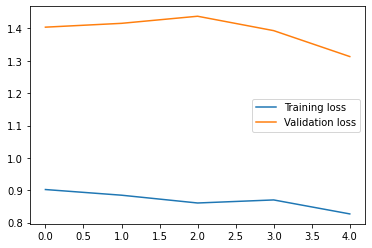

In [12]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [39]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 50
n_days_for_prediction=16  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq="m").tolist()
print(predict_period_dates)

[Timestamp('2010-01-31 00:00:00', freq='M'), Timestamp('2010-02-28 00:00:00', freq='M'), Timestamp('2010-03-31 00:00:00', freq='M'), Timestamp('2010-04-30 00:00:00', freq='M'), Timestamp('2010-05-31 00:00:00', freq='M'), Timestamp('2010-06-30 00:00:00', freq='M'), Timestamp('2010-07-31 00:00:00', freq='M'), Timestamp('2010-08-31 00:00:00', freq='M'), Timestamp('2010-09-30 00:00:00', freq='M'), Timestamp('2010-10-31 00:00:00', freq='M'), Timestamp('2010-11-30 00:00:00', freq='M'), Timestamp('2010-12-31 00:00:00', freq='M'), Timestamp('2011-01-31 00:00:00', freq='M'), Timestamp('2011-02-28 00:00:00', freq='M'), Timestamp('2011-03-31 00:00:00', freq='M'), Timestamp('2011-04-30 00:00:00', freq='M')]


In [42]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

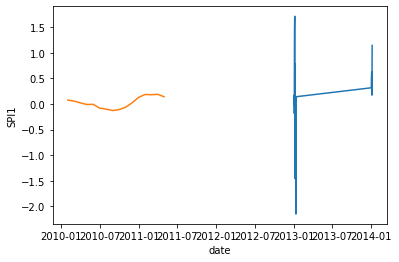

In [43]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'SPI1':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])


original = df[['date', 'SPI1']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2012-5-1']

sns.lineplot(original['date'], original['SPI1'])
sns.lineplot(df_forecast['date'], df_forecast['SPI1'])

In [38]:
df_forecast['SPI1']

0     0.077607
1     0.077756
2     0.058674
3     0.023173
4    -0.008702
5    -0.005353
6    -0.080406
7    -0.099389
8    -0.126938
9    -0.108714
10   -0.060819
11    0.023925
12    0.131012
13    0.187340
14    0.181713
15    0.190644
16    0.142341
Name: SPI1, dtype: float32